# Modeliranje 1-D porazdelitve: razpadi Higgsovega bozona

Repozitorij naloge: https://github.com/j-gavran/PSUF_Hmumu

## 1. naloga: Praktikum strojnega učenja v fiziki 2024/25

**predavatelj**: [prof. dr. Borut Paul Kerševan](mailto:borut.kersevan@ijs.si)  
**asistent**: [Jan Gavranovič](mailto:jan.gavranovic@ijs.si)

# Metode jeder (kernel methods)

- Imamo $N$ vrednosti neke funkcije $y_n = f(\vec{x}_n)$ za $n=1:N$, kjer je $f$ neznana funkcija.
- Naša podatkovna (učna) množica je torej $\mathcal{D}=\{(\vec{x}_n, y_n)\}$.
- Če želimo napovedati vrednosti $f$ v novi točki $\vec{x}_*$, moramo primerjati $\vec{x}_*$ z vsemi $N$ vrednostmi $\{\vec{x}_n\}$, pri tem je $f(\vec{x}_*)$ neka utežena kombinacija vrednosti $\{f(\vec{x}_n)\}$.
- Uteži so določene kako podobne so si vrednosti $\vec{x}_*$ in $\vec{x}_n$.
- To podobnost izračuna jedrna funkcija $\mathcal{K}(\vec{x}_n, \vec{x}_*) \geq 0$.

## Mercerjeva jedra

- Potrebujemo način kako povedati ali sta dva vhoda vektorja podobna.
- Če vemo, da je $\vec{x}_i$ podoben $\vec{x}_j$, potem morata biti napovedani vrednosti modela $f(\vec{x}_i)$ in $f(\vec{x}_j)$ tudi podobni.
- Da bomo lahko povedali kaj je podbno, definiramo jedrne funkcije (*kernel functions*).
- Zanimamo se za Mercerjeva jedra, tudi poziitvno definitna jedra. To so simetrične funkcije $\mathcal{K}: \mathcal{X} \times \mathcal{X}\rightarrow \mathbb{R}^+$ za katere velja:
$$
\sum_{i=1}^N \sum_{j=1}^N \mathcal{K}(\vec{x}_i, \vec{x}_j)c_i c_j \geq 0 
$$
za množico $N$ točk $\vec{x_i} \in \mathcal{X}$ in za neko izbiro $c_i \in \mathbb{R}$.

- Pogoj lahko razumemo v matrični obliki. Za $N$ podatkovni točk definiramo $N \times N$ podobnostno matriko:
$$
K = 
\begin{bmatrix}
    \mathcal{K}(\vec{x}_1, \vec{x}_1) & \mathcal{K}(\vec{x}_1, \vec{x}_2) & \cdots & \mathcal{K}(\vec{x}_1, \vec{x}_N) \\
    \mathcal{K}(\vec{x}_2, \vec{x}_1) & \mathcal{K}(\vec{x}_2, \vec{x}_2) & \cdots & \mathcal{K}(\vec{x}_2, \vec{x}_N) \\
    \vdots          & \vdots          & \ddots & \vdots          \\
    \mathcal{K}(\vec{x}_N, \vec{x}_1) & \mathcal{K}(\vec{x}_N, \vec{x}_2) & \cdots & \mathcal{K}(\vec{x}_N, \vec{x}_N)
\end{bmatrix} \>.
$$
- $\mathcal{K}$ je Mercerjevo jedro, če je matrika $K$ pozitivno definitna za katerikoli množico vhodnih vektorjev $\{ \vec{x}_i\}_{i=1}^N$.
- Najbolj pogosto jedro je RBF (*radial basis function kernel*):
$$
\mathcal{K}(\vec{x}, \vec{x}^\prime) = \sigma^2 \exp \left( \frac{||\vec{x} - \vec{x}^\prime||^2}{2\ell^2} \right) \>,
$$
kjer je $\ell$ karakteristična dolžina (*length scale*) jedra in $\sigma^2$ skala (*scale*). Paramter $\ell$ je razdalja na kateri pričakujemo, da bodo naše razlike vektorjev še pomembne. Temu parametru se reče tudi *bandwidth*.
- RBF jedro meri podobnost med dvema vektorjema v $\mathbb{R}^D$ s (skalirano) evklidsko razdaljo.
- Če je vrednost $\mathcal{K}(\vec{x}, \vec{x}^\prime)$ velika, potem sta si vhodni vrednosti podobni in pričakujemo $f(\vec{x}) \approx f(\vec{x}^\prime)$.
- Informacija o $f(\vec{x})$ nam torej pomaga napovedati novo vrednost $f(\vec{x}^\prime)$ za vse $\vec{x}^\prime$, ki so korelirani z $\vec{x}$ in za katere je vrednost $\mathcal{K}$ velika.
- Glej https://www.cs.toronto.edu/~duvenaud/cookbook/. 

## Mercerjev teorem

- Vsako pozitivno definitvno matriko $K$ lahko razstavimo na $K=U^\top \Lambda U$, kjer je $\Lambda$ diagonalna matrika lastnih rednosti $\lambda_i>0$ in $U$ matrika lastnih vektorjev.
- Matriko $K$ lahko zapišemo po elementih $(i,j)$ kot:
$$
k_{ij} = (\Lambda^{\frac{1}{2}} \vec{u}_i)^\top (\Lambda^{\frac{1}{2}} \vec{u}_j) \>,
$$
kjer sta $\vec{u}_{i,j}$ stolpca $i,j$ matrike $U$.
- Definiramo $\vec{\phi}(\vec{x}_i)=\Lambda^{\frac{1}{2}} \vec{u}_i$ s čemer lahko sedaj zapišemo elemente matrike kot
$$
k_{ij} = \vec{\phi}(\vec{x}_i)^\top \vec{\phi}(\vec{x}_j) = \sum_m \phi_m(\vec{x}_i)\phi_m(\vec{x}_j) \>.
$$
- Vidimo, da lahko izračunamo elemente jedrne matrike $K$ s skalarnim produktom nekih (*feature*) vektorjev, ki so implicitno definirani z lastnimi vektorji te matrike.
- Rezultat je poznan pod imenom Mercerjev teorem.

#### Primer kvadratičnega jedra

- Zamislimo si jedro oblike $\mathcal{K}(\vec{x}, \vec{x}^\prime)=(\vec{x}^\top \vec{x}^\prime)^2$.
- V dveh dimenzijah imamo:
$$
\mathcal{K}(\vec{x}, \vec{x}^\prime) = (x_1x_2^\prime + x_2x_2^\prime)^2 = x_1^2x_1^{\prime 2} + 2 x_1x_2x_1^\prime x_2^\prime + x_2^2x_2^{\prime 2} \>.
$$
- To lahko zapišemo kot $\mathcal{K}(\vec{x}, \vec{x}^\prime)=\vec{\phi}(\vec{x})^\top \vec{\phi}(\vec{x})$, če definiramo
$$
\vec{\phi}(x_1,x_2) = [x_1^2, \sqrt{2}x_1x_2, x_2^2] \in \mathbb{R}^3 \>.
$$
- S tem smo zapisali (*embed*) 2d vhodne podatke v 3d (*feature*) prostor $\vec{\phi}(\vec{x})$.

#### Primer jedra RBF

- V primeru jedra RBF imamo vektorje $\vec{\phi}$ v [neskončno](https://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf) dimenzionalnem prostoru $\vec{\phi}_{\text{RBF}}(\vec{x}):\mathbb{R}^n\rightarrow \mathbb{R}^\infty$.
- RBF lahko zapišemo z razvojem:

$$
k_{ij} = \sigma^2 \phi(x_i)^\top \phi(x_j) = \sigma^2 \exp \left\{ - \frac{1}{2\ell^2}(x_i^2 + x_j^2)\right\} \sum_{k=0}^q \left( \frac{x_ix_j}{\ell^2} \right)^k \frac{1}{k!} \>.
$$


In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# https://andrewcharlesjones.github.io/journal/rbf.html

def finite_RBF(x, y, q, sigma2, length_scale):    
    # constant term
    C = sigma2 * np.exp(-0.5 * (x**2 + y**2) / length_scale**2)

    # interaction between x and y
    qsum = 0.0
    for k in range(q):
        qsum += (x * y / length_scale**2) ** k / math.factorial(k)

    return C * qsum


def get_K(x, q, sigma2=1.0, length_scale=1.0):
    # define matrix of zeros to fill
    K = np.zeros((n, n))
    
    for i in range(len(x)):
        for j in range(i + 1):
            # get k_ij element
            k = finite_RBF(x[i], x[j], q, sigma2, length_scale)
            # K is symmetric 
            K[i, j] = k
            K[j, i] = k

    return K

In [3]:
n = 100 # vector dimension
q = 32 # number of terms in Taylor expension of exp
sigma2, length_scale = 1.0, 1.0 # RBF parameters
x = np.linspace(-3, 3, n) # dummy vector

In [4]:
K = get_K(x, q, sigma2, length_scale)

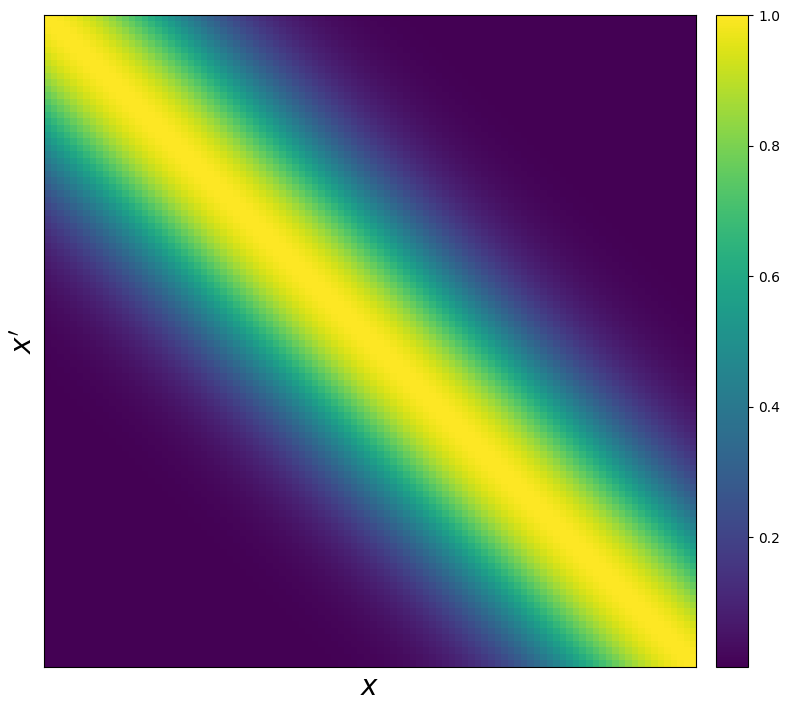

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

im = ax.matshow(K)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.2)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$x^\prime$", fontsize=20)

plt.tight_layout()